In [2]:
import pathlib
import numpy as np

# turn our training path into a Python path
data_dir = pathlib.Path("C:/Users/mrdip/Desktop/lab5/101_food/train/")

# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['apple_pie' 'deviled_eggs' 'lobster_bisque']


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "C:/Users/mrdip/Desktop/lab5/101_food/test/"
test_dir = "C:/Users/mrdip/Desktop/lab5/101_food/train/"

In [4]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


# 1. CNN model

1.1 Adam optimizer

In [5]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/2
24/24 [==============================] - 24s 955ms/step - loss: 1.0756 - accuracy: 0.4493 - val_loss: 1.0097 - val_accuracy: 0.4978
Epoch 2/2
24/24 [==============================] - 21s 870ms/step - loss: 0.9572 - accuracy: 0.5253 - val_loss: 0.9563 - val_accuracy: 0.5778


In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [7]:
model_1.evaluate(valid_data)

8/8 [==============================] - 2s 223ms/step - loss: 0.9563 - accuracy: 0.5778


[0.9562879204750061, 0.5777778029441833]

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


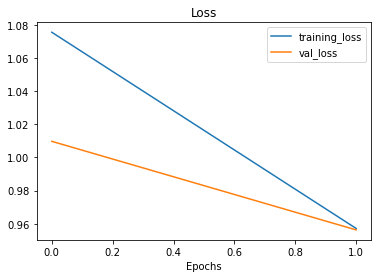

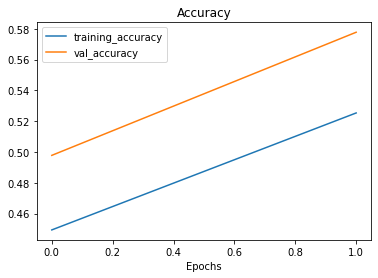

In [12]:
plot_loss_curves(history_1)

1.2 SGD optimizer

In [13]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/2
24/24 [==============================] - 22s 889ms/step - loss: 1.1127 - accuracy: 0.3440 - val_loss: 1.0837 - val_accuracy: 0.4133
Epoch 2/2
24/24 [==============================] - 22s 898ms/step - loss: 1.0700 - accuracy: 0.4320 - val_loss: 1.0621 - val_accuracy: 0.4311


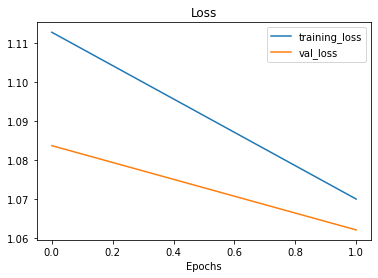

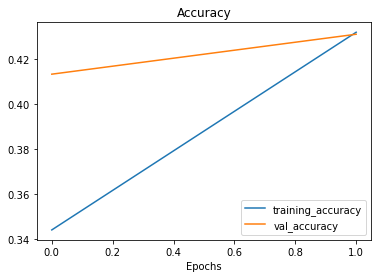

In [14]:
plot_loss_curves(history_2)

2. ResNet101 model

2.1 Adam optimizer

In [15]:
model_2=tf.keras.applications.ResNet101(include_top=False)
model_2.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_2(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_resnet=tf.keras.Model(inputs,outputs)

171458560/171446536 [==============================] - 17s 0us/step


In [16]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [17]:
history_resnet_adam =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 105s 4s/step - loss: 1.0853 - accuracy: 0.4333 - val_loss: 1.0648 - val_accuracy: 0.4400
Epoch 2/2
24/24 [==============================] - 96s 4s/step - loss: 1.0199 - accuracy: 0.5173 - val_loss: 1.0365 - val_accuracy: 0.4444


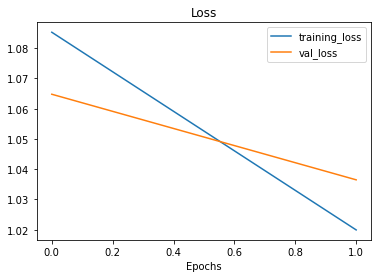

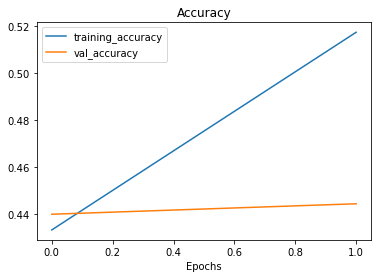

In [18]:
plot_loss_curves(history_resnet_adam)

In [19]:
model_resnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, None, None, 2048)  42658176  
                                                                 
 gap_layer (GlobalAveragePoo  (None, 2048)             0         
 ling2D)                                                         
                                                                 
 output_layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 42,664,323
Trainable params: 6,147
Non-trainable params: 42,658,176
_________________________________________________________________


fine-tune resnet model

In [21]:
for layer in model_2.layers[-10:]:
    layer.trainable=True

In [22]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [23]:
history_resnet_adam_1 =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 104s 4s/step - loss: 0.9406 - accuracy: 0.5360 - val_loss: 1.0831 - val_accuracy: 0.4489
Epoch 2/2
24/24 [==============================] - 94s 4s/step - loss: 0.8925 - accuracy: 0.5627 - val_loss: 1.0880 - val_accuracy: 0.4400


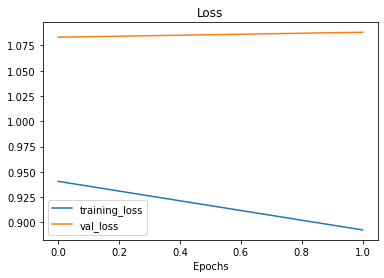

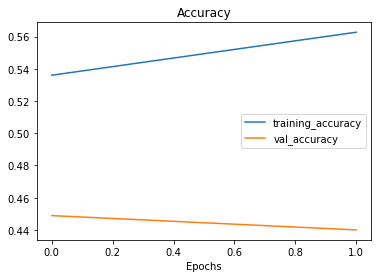

In [24]:
plot_loss_curves(history_resnet_adam_1)

2.2 SGD

In [25]:
model_2.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=model_2(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)
model_resnet=tf.keras.Model(inputs,outputs)

model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)

history_resnet_sgd =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 95s 4s/step - loss: 1.2605 - accuracy: 0.3680 - val_loss: 1.2219 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 89s 4s/step - loss: 1.2850 - accuracy: 0.3907 - val_loss: 1.1213 - val_accuracy: 0.3333


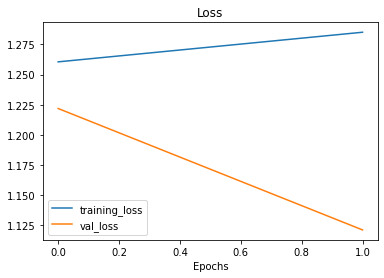

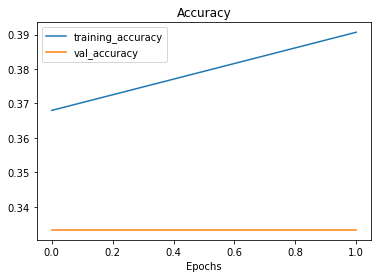

In [26]:
plot_loss_curves(history_resnet_sgd)

3. Efficient model

3.1 Adam

In [27]:
model_3=tf.keras.applications.EfficientNetB0(include_top=False)
model_3.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_3(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_efficient=tf.keras.Model(inputs,outputs)

16719872/16705208 [==============================] - 2s 0us/step


In [28]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [29]:
# model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_efficient_adam =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 36s 1s/step - loss: 1.1033 - accuracy: 0.3373 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 29s 1s/step - loss: 1.1041 - accuracy: 0.3373 - val_loss: 1.1008 - val_accuracy: 0.3333


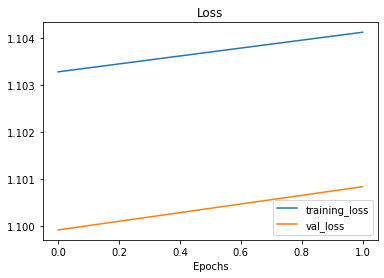

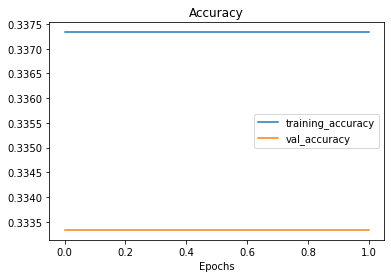

In [30]:
plot_loss_curves(history_efficient_adam)

In [31]:
for layer in model_3.layers[-10:]:
    layer.trainable=True

In [32]:
def model_trainable_layers(model):
    for layer_number, layer in enumerate(model.layers):
        print(layer_number, layer.name, layer.trainable, len(layer.trainable_variables))

In [33]:
model_trainable_layers(model_3)

0 input_2 False 0
1 rescaling False 0
2 normalization False 0
3 stem_conv_pad False 0
4 stem_conv False 0
5 stem_bn False 0
6 stem_activation False 0
7 block1a_dwconv False 0
8 block1a_bn False 0
9 block1a_activation False 0
10 block1a_se_squeeze False 0
11 block1a_se_reshape False 0
12 block1a_se_reduce False 0
13 block1a_se_expand False 0
14 block1a_se_excite False 0
15 block1a_project_conv False 0
16 block1a_project_bn False 0
17 block2a_expand_conv False 0
18 block2a_expand_bn False 0
19 block2a_expand_activation False 0
20 block2a_dwconv_pad False 0
21 block2a_dwconv False 0
22 block2a_bn False 0
23 block2a_activation False 0
24 block2a_se_squeeze False 0
25 block2a_se_reshape False 0
26 block2a_se_reduce False 0
27 block2a_se_expand False 0
28 block2a_se_excite False 0
29 block2a_project_conv False 0
30 block2a_project_bn False 0
31 block2b_expand_conv False 0
32 block2b_expand_bn False 0
33 block2b_expand_activation False 0
34 block2b_dwconv False 0
35 block2b_bn False 0
36 bloc

In [34]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [35]:
history_efficient_adam_1 =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 35s 1s/step - loss: 1.1142 - accuracy: 0.3507 - val_loss: 1.1048 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 28s 1s/step - loss: 1.1095 - accuracy: 0.3427 - val_loss: 1.1004 - val_accuracy: 0.3333


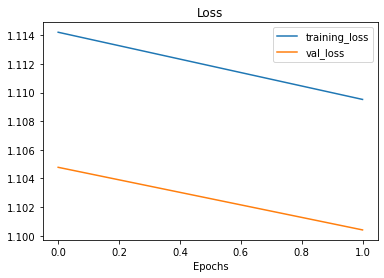

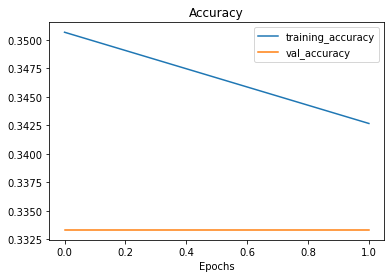

In [36]:
plot_loss_curves(history_efficient_adam_1)

SGD

In [37]:
model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
history_efficient_sgd =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 33s 1s/step - loss: 1.1008 - accuracy: 0.3440 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 28s 1s/step - loss: 1.0979 - accuracy: 0.3480 - val_loss: 1.0988 - val_accuracy: 0.3333


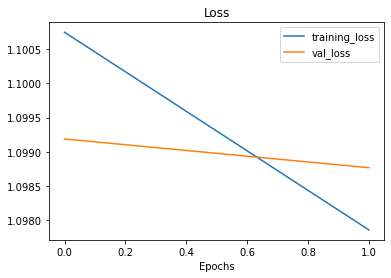

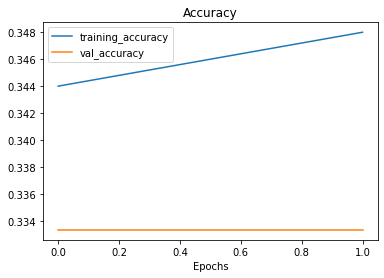

In [38]:
plot_loss_curves(history_efficient_sgd)

Usage of EfficientNetB4 instead of EfficientNetB0

In [39]:
model_4=tf.keras.applications.EfficientNetB4(include_top=False)
model_4.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_4(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_efficient=tf.keras.Model(inputs,outputs)

71696384/71686520 [==============================] - 9s 0us/step


In [40]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [41]:
history_efficient_sgd =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        validation_data=valid_data)

Epoch 1/2
24/24 [==============================] - 83s 3s/step - loss: 1.1202 - accuracy: 0.3320 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 72s 3s/step - loss: 1.1092 - accuracy: 0.3187 - val_loss: 1.1018 - val_accuracy: 0.3333


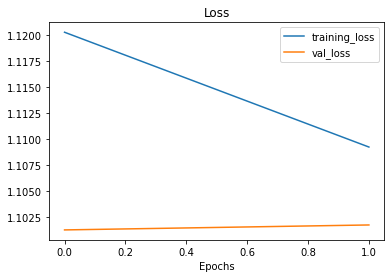

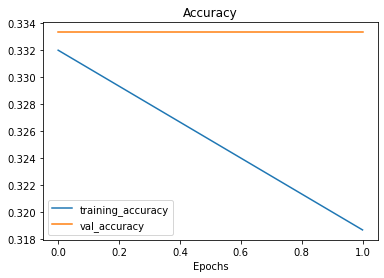

In [42]:
plot_loss_curves(history_efficient_sgd)